<a href="https://colab.research.google.com/github/Gustavo-dev04/Analise-de-dados-de-acoes-com-ia/blob/main/Coleta_e_Processamento_de_Dados/Processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta e Limpeza / Visualização de dados:
## **📌 Descrição**
1. Este projeto utiliza planilhas(Google Sheets/Excel) e a linguagem R (Positive Cloud) a partir de:

- Dados estruturados (séries temporais financeiras).

## **📈 Objetivos**:

- Coletar e processar dados multimodais (numéricos + textuais).
- Visualização de dados (Google Sheets + R).
- Verificar a saúde financeira da empresa.

## **🔝 Créditos de Cursos Utilizados**
### Cursos de Análise de Dados:
- Data Analytics (Google)
- Advanced Data Analytics (Google)
- Data Analytics Cloud (Google Cloud)



#**Coleta, Limpeza e Visualizaçao de dados via Excel/Google Sheets**:

# Recursos:
- Visualizações mais simples e menos técnicas.
- Visualização direta dos dados.

# Objetivo:
- Visualização para as partes interessadas.
- Analisar dados para tirar insights dos dados.
- Buscar melhoras e investimentos futuros.

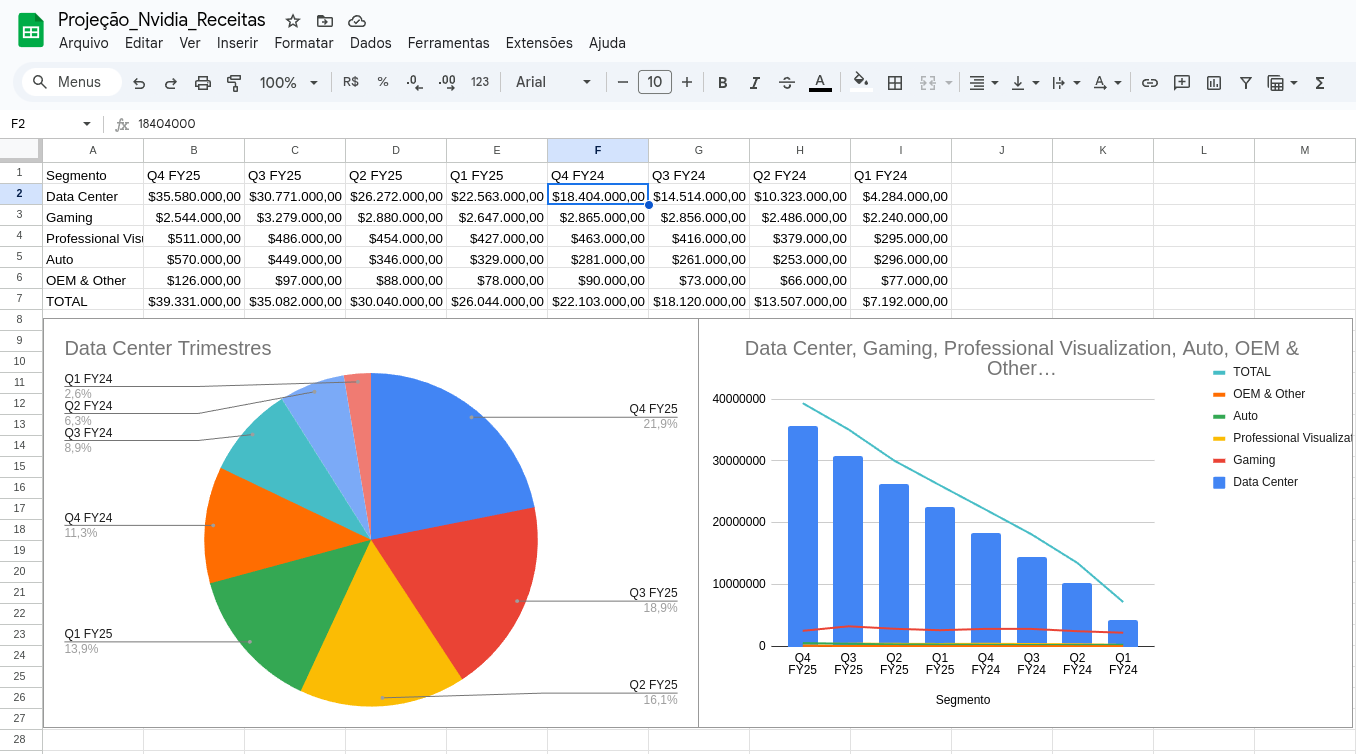

# **✅ Resultados da Análise e Visualização dos dados trimestrais da Nvidia via Excel:**
1. Data Center como o vetor principal da empresa.
2. Visualização do crescimento e da dominância do Data Center no fator financeiro da empresa.
3. Pouco técnico, porém visualização clara
4. Possibilidade para possíveis investimentos e melhoras em outros setores.


# **Visualizaçao e Análise mais tecnica utilizando R:**
# Recursos:
- Visualizações mais profissionais e técnicas.
- Visualização mais enfática e especifica dos dados.

# Objetivo:
- Visualização para as partes interessadas.
- Analisar dados para tirar insights dos dados.
- Buscar melhoras e investimentos futuros.
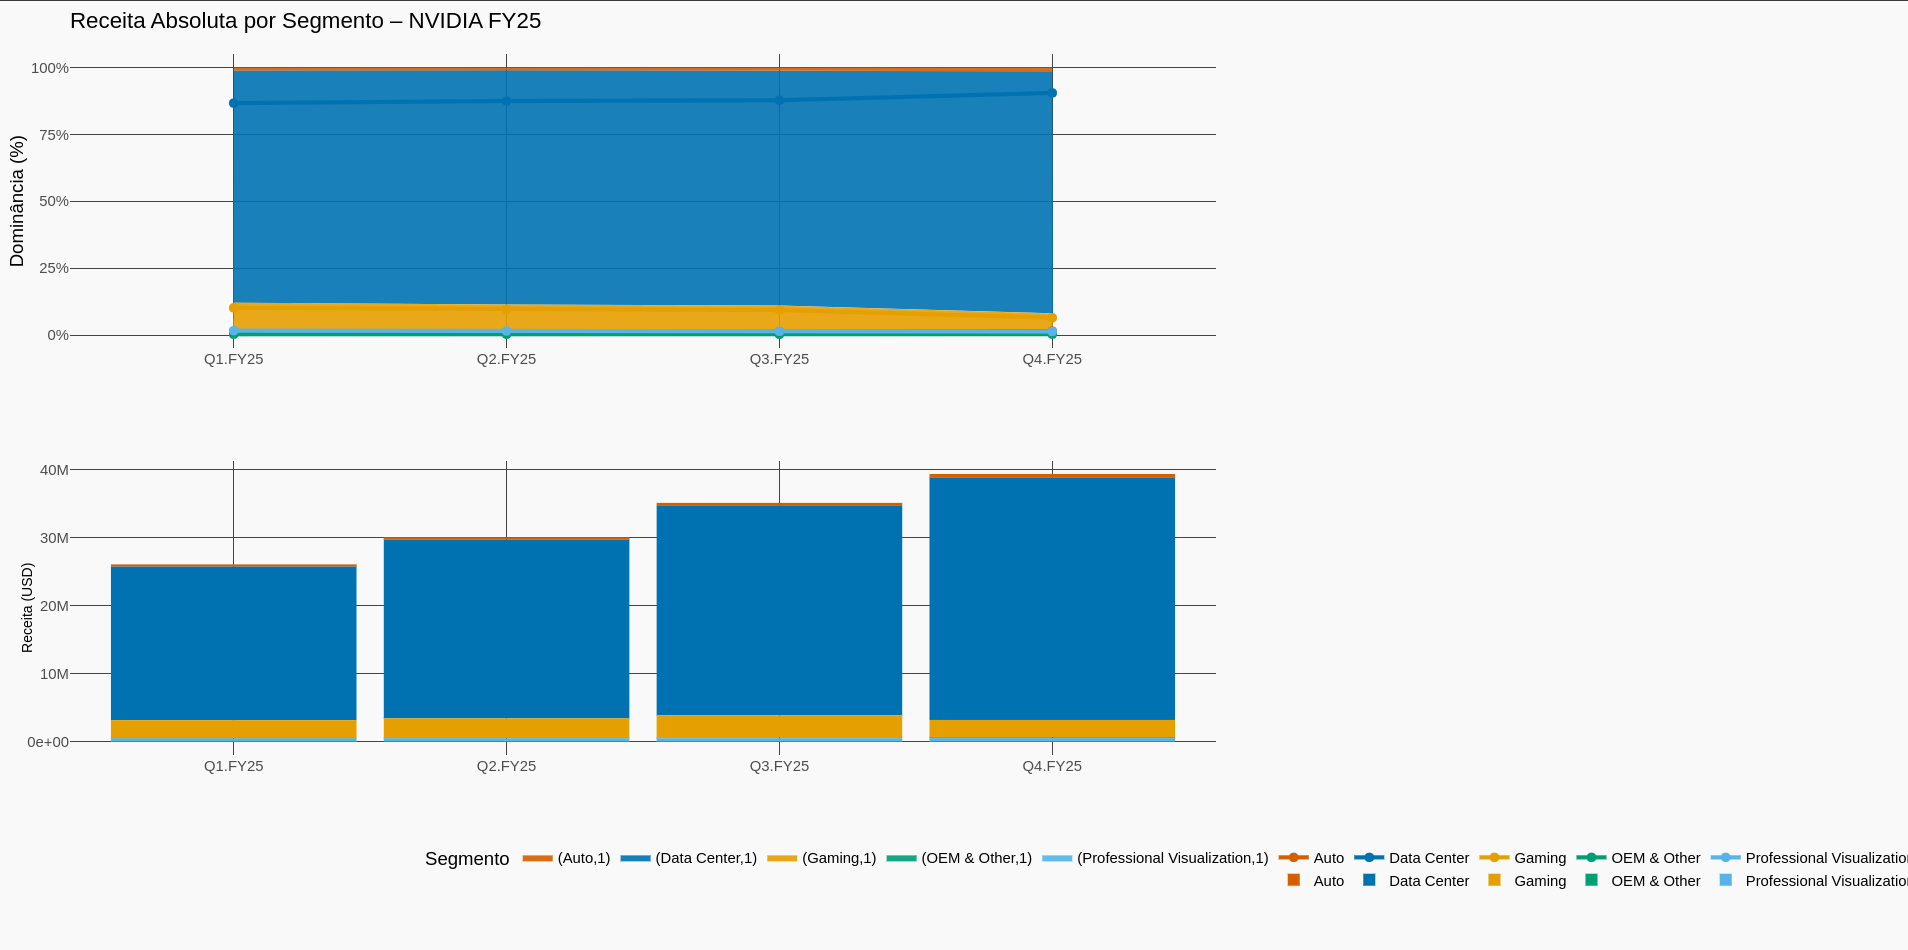

# **✅ Resultados da Análise e Visualização dos dados trimestrais da Nvidia via Rstudio:**
1. Data Center como o vetor principal da empresa.
2. Visualização do crescimento e da dominância porcentual do Data Center no fator financeiro da empresa comparando com os outros aos setores ao mesmo tempo.
3. Mais tecnico e graficos dinamicos.
4. Possivel escalonamento e atualizacao de dados.
5. Possibilidade para possiveis investimentos e melhoras em outros setores.

# **🔗 Codigo Usado:**


```
library(tidyverse)
library(plotly)
library(scales)

dados_brutos <- data.frame(
  Segmento = c("Data Center", "Gaming", "Professional Visualization", "Auto", "OEM & Other"),
  Q1.FY25 = c(22563000, 2647000, 427000, 329000, 78000),
  Q2.FY25 = c(26272000, 2880000, 454000, 346000, 88000),
  Q3.FY25 = c(30771000, 3279000, 486000, 449000, 97000),
  Q4.FY25 = c(35580000, 2544000, 511000, 570000, 126000)
)

dados_long <- dados_brutos %>%
  pivot_longer(cols = starts_with("Q"), names_to = "Trimestre", values_to = "Receita") %>%
  group_by(Trimestre) %>%
  mutate(
    Receita_Total = sum(Receita),
    Dominancia = Receita / Receita_Total
  ) %>%
  ungroup() %>%
  arrange(Segmento, Trimestre) %>%
  group_by(Segmento) %>%
  mutate(Variacao_Percentual = (Dominancia / lag(Dominancia) - 1) * 100) %>%
  ungroup() %>%
  mutate(Trimestre = factor(Trimestre, levels = c("Q1.FY25", "Q2.FY25", "Q3.FY25", "Q4.FY25")))

cores_modernas <- c(
  "Data Center" = "#0072B2",
  "Gaming" = "#E69F00",
  "Professional Visualization" = "#56B4E9",
  "Auto" = "#D55E00",
  "OEM & Other" = "#009E73"
)

formatar_valor <- function(x) {
  case_when(
    x >= 1e9 ~ paste0(round(x / 1e9, 1), "B"),
    x >= 1e6 ~ paste0(round(x / 1e6, 1), "M"),
    TRUE ~ format(x, big.mark = ",")
  )
}

grafico_dominancia <- ggplot(dados_long, aes(x = Trimestre, y = Dominancia, fill = Segmento, group = Segmento)) +
  geom_area(alpha = 0.9, position = "stack") +
  geom_line(aes(color = Segmento), size = 1.1) +
  geom_point(size = 2, aes(color = Segmento)) +
  scale_fill_manual(values = cores_modernas) +
  scale_color_manual(values = cores_modernas) +
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  labs(
    title = "Dominância Percentual por Segmento – NVIDIA FY25",
    subtitle = "Participação proporcional por trimestre fiscal",
    x = "Trimestre",
    y = "Dominância (%)",
    fill = "Segmento",
    color = "Segmento"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.major = element_line(color = "#444444"),
    plot.background = element_rect(fill = "#F9F9F9", color = NA),
    panel.background = element_rect(fill = "#F9F9F9", color = NA),
    legend.position = "bottom"
  )

grafico_interativo_dominancia <- ggplotly(grafico_dominancia, tooltip = c("x", "y", "fill")) %>%
  style(
    text = ~paste0(
      "Segmento: ", dados_long$Segmento, "<br>",
      "Dominância: ", percent(dados_long$Dominancia, accuracy = 0.1), "<br>",
      "Variação: ", ifelse(is.na(dados_long$Variacao_Percentual), "–",
                           sprintf("%.1f%%", dados_long$Variacao_Percentual))
    )
  ) %>%
  layout(
    legend = list(orientation = "h", x = 0.3, y = -0.2),
    font = list(size = 12)
  )

grafico_receita <- ggplot(dados_long, aes(x = Trimestre, y = Receita, fill = Segmento)) +
  geom_col(position = "stack") +
  scale_fill_manual(values = cores_modernas) +
  scale_y_continuous(labels = formatar_valor) +
  labs(
    title = "Receita Absoluta por Segmento – NVIDIA FY25",
    subtitle = "Valores consolidados em dólares (USD)",
    x = "Trimestre",
    y = "Receita (USD)",
    fill = "Segmento"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.major = element_line(color = "#444444"),
    plot.background = element_rect(fill = "#F9F9F9", color = NA),
    panel.background = element_rect(fill = "#F9F9F9", color = NA),
    legend.position = "bottom"
  )

grafico_interativo_receita <- ggplotly(grafico_receita, tooltip = c("x", "y", "fill")) %>%
  layout(
    legend = list(orientation = "h", x = 0.3, y = -0.2),
    font = list(size = 12)
  )

subplot(
  grafico_interativo_dominancia,
  grafico_interativo_receita,
  nrows = 2,
  margin = 0.08,
  titleY = TRUE,
  heights = c(0.5, 0.5)
)

```

